In [ ]:
import sys
print(sys.executable)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For handling data in chunks
chunk_size = 100000

pd.set_option('display.max_columns', 100) #Setting Maximum limit of columns to 100
pd.set_option('display.max_rows', 200) #Setting Maximum limit of rows to 100
sns.set_style("whitegrid") #Setting background for display as whitegrid
              
# Setting paths for all csv data
datasets = {
    "transactions": pd.read_csv("F:/AI Project/churn-retention-platform/data/raw/transactions.csv"),
    "members": pd.read_csv("F:/AI Project/churn-retention-platform/data/raw/members_v3.csv"),
    "trainingData": pd.read_csv("F:/AI Project/churn-retention-platform/data/raw/train.csv"),
    "userData": pd.read_csv("F:/AI Project/churn-retention-platform/data/raw/user_logs.csv"),
}

# Setting up all the fuctions
# BASIC STRUCTURE
def basic_structure(df):
    print("Shape:", df.shape)
    display(df.head())
    display(df.tail())


# DUPLICATES CHECK
# Set subset to None to let use all columns for duplicate detection
def duplicate_check(df):
    print("Duplicate rows:", df.duplicated().sum())


# DATA TYPES
def data_types_check(df):
    display(df.dtypes)


# MISSING VALUE ANALYSIS
def missing_values_summary(df):
    missing = pd.DataFrame({
        "missing_count": df.isna().sum(),
        "missing_percent": df.isna().mean() * 100
    }).sort_values("missing_percent", ascending=False)
    
    return missing[missing["missing_percent"] > 0]


# FEATURE RELEVANCE PRE-SCREENING
def feature_cardinality(df):
    return pd.DataFrame({
        "unique_values": df.nunique(),
        "unique_percent": df.nunique() / len(df) * 100
    }).sort_values("unique_percent", ascending=False)


# NUMERICAL PLAUSIBILITY CHECKS
def numeric_summary(df):
    numeric_cols = df.select_dtypes(include=np.number)
    return numeric_cols.describe(percentiles=[0.01,0.05,0.95,0.99]).T


# SIMPLE OUTLIER SCAN
def outlier_scan(df):
    numeric_cols = df.select_dtypes(include=np.number)
    for col in numeric_cols.columns:
        plt.figure(figsize=(5,2))
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()


# CATEGORICAL DISTRIBUTIONS
def categorical_summary(df, top_n=10):
    cat_cols = df.select_dtypes(include="object")
    for col in cat_cols.columns:
        print(f"\nColumn: {col}")
        display(df[col].value_counts(dropna=False).head(top_n))


# DATE / TIME CHECKS
def datetime_check(df):
    for col in df.columns:
        if "date" in col.lower() or "time" in col.lower():
            print(col)
            display(df[col].head())


# TARGET VARIABLE CHECK
def target_analysis(df, target_col):
    print(df[target_col].value_counts(normalize=True) * 100)
    
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[target_col])
    plt.title("Target Distribution")
    plt.show()


# QUICK FEATURE ↔ TARGET SIGNAL CHECK

# Numeric → Target
def numeric_vs_target(df, target_col):
    numeric_cols = df.select_dtypes(include=np.number).drop(columns=[target_col], errors="ignore")
    for col in numeric_cols.columns[:5]:
        sns.boxplot(x=df[target_col], y=df[col])
        plt.title(col)
        plt.show()

# Categorical → Target
def categorical_vs_target(df, target_col):
    cat_cols = df.select_dtypes(include="object")
    for col in cat_cols.columns[:5]:
        display(df.groupby(col)[target_col].mean().sort_values(ascending=False))


# LEAKAGE SANITY CHECK
def leakage_scan(df, target_col):
    corr = df.select_dtypes(include=np.number).corr()[target_col].sort_values(ascending=False)
    display(corr.head(10))


# Final
def eda_summary(df):
    print("Rows:", df.shape[0])
    print("Columns:", df.shape[1])
    print("Duplicate Rows:", df.duplicated().sum())
    print("Columns >40% missing:", (df.isna().mean() > 0.4).sum())


for name, df in datasets.items():
    print("\n" + "="*50)
    print("EDA FOR:", name)
    print("="*50)
    
    basic_structure(df)
    duplicate_check(df)
    data_types_check(df)
    display(missing_values_summary(df))
    display(feature_cardinality(df))
    display(numeric_summary(df))


RUNNING EDA FOR: MEMBERS

members | Shape: (1048575, 6)


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


Duplicate rows (sample-level): 0


msno                      object
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int64
dtype: object


Missing Values (%)


gender                    61.012422
msno                       0.000000
city                       0.000000
bd                         0.000000
registered_via             0.000000
registration_init_time     0.000000
dtype: float64


Feature Cardinality


,unique_count,unique_percent
msno,1048575,100.000000
registration_init_time,4774,0.455285
bd,205,0.019550
city,21,0.002003
registered_via,16,0.001526
gender,2,0.000191



Numeric Summary (Sample)


,count,mean,std,min,25%,50%,75%,max
city,1048575.0,4.447538e+00,5.853836,1.0,1.0,1.0,5.0,22.0
bd,1048575.0,1.129994e+01,17.806320,-974.0,0.0,0.0,24.0,1820.0
registered_via,1048575.0,5.593624e+00,2.529805,1.0,3.0,4.0,9.0,19.0
registration_init_time,1048575.0,2.013852e+07,27204.433806,20040326.0,20130630.0,20141104.0,20160409.0,20170429.0



Categorical Summary

msno


msno
Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=    1
+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=    1
cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=    1
9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=    1
WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=    1
yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=    1
jNCGK78YkTyId3H3wFavcBLDmz7pfqlvCfUKf4G1Lw4=    1
WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=    1
tKmbR4X5VXjHmxERrckawEMZ4znVy1lAQIR1vV5rdNk=    1
I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=    1
Name: count, dtype: int64


gender


gender
NaN       639761
male      208347
female    200467
Name: count, dtype: int64


Outlier Scan


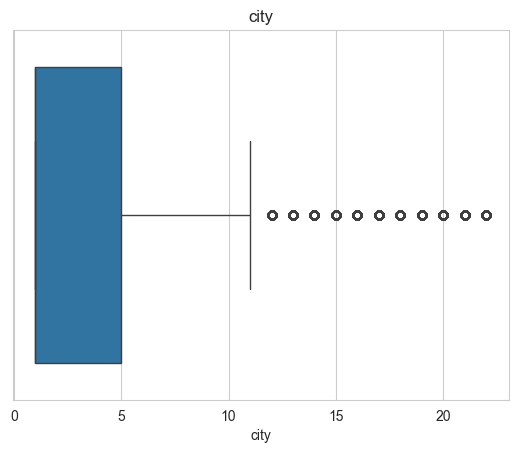

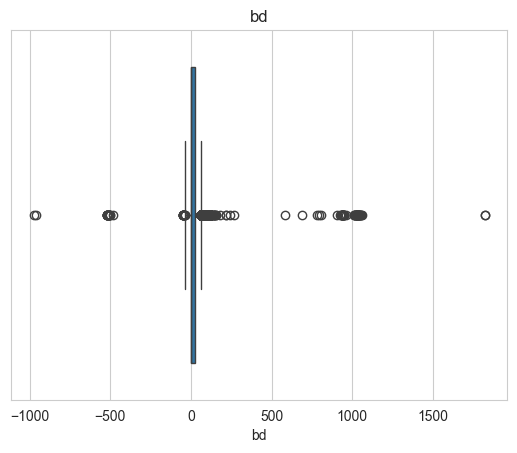

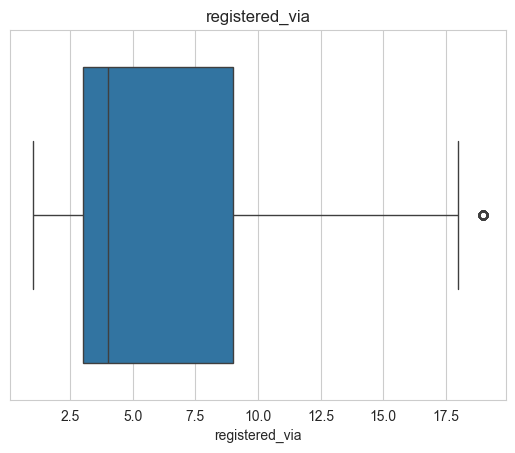

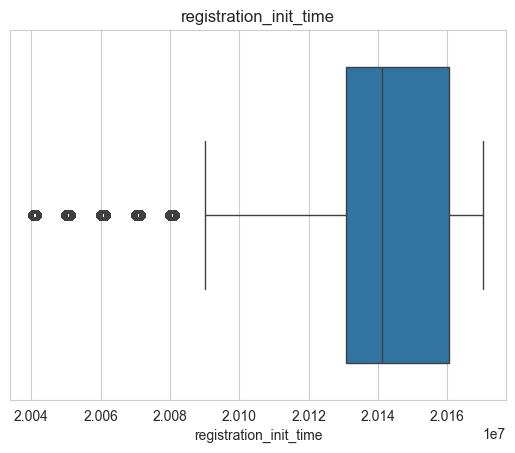


Date Coverage


,registration_init_time
min,20040326
max,20170429



RUNNING EDA FOR: TRANSACTIONS

transactions | Shape: (21547746, 9)


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


Duplicate rows (sample-level): 3339


msno                      object
payment_method_id          int64
payment_plan_days          int64
plan_list_price            int64
actual_amount_paid         int64
is_auto_renew              int64
transaction_date           int64
membership_expire_date     int64
is_cancel                  int64
dtype: object


Missing Values (%)


msno                      0.0
payment_method_id         0.0
payment_plan_days         0.0
plan_list_price           0.0
actual_amount_paid        0.0
is_auto_renew             0.0
transaction_date          0.0
membership_expire_date    0.0
is_cancel                 0.0
dtype: float64


Feature Cardinality


,unique_count,unique_percent
msno,2363626,10.969249
membership_expire_date,1559,0.007235
transaction_date,790,0.003666
actual_amount_paid,57,0.000265
plan_list_price,51,0.000237
payment_method_id,40,0.000186
payment_plan_days,37,0.000172
is_auto_renew,2,0.000009
is_cancel,2,0.000009



Numeric Summary (Sample)


,count,mean,std,min,25%,50%,75%,max
payment_method_id,21547746.0,3.893310e+01,3.507936,1.0,38.0,41.0,41.0,41.0
payment_plan_days,21547746.0,3.133906e+01,30.356494,0.0,30.0,30.0,30.0,450.0
plan_list_price,21547746.0,1.398850e+02,130.964700,0.0,99.0,149.0,149.0,2000.0
actual_amount_paid,21547746.0,1.419873e+02,132.482424,0.0,99.0,149.0,149.0,2000.0
is_auto_renew,21547746.0,8.519661e-01,0.355134,0.0,1.0,1.0,1.0,1.0
transaction_date,21547746.0,2.015760e+07,6155.979050,20150101.0,20150906.0,20160321.0,20160925.0,20170228.0
membership_expire_date,21547746.0,2.015862e+07,7755.752699,19700101.0,20151019.0,20160430.0,20161031.0,20170331.0
is_cancel,21547746.0,3.976523e-02,0.195407,0.0,0.0,0.0,0.0,1.0



Categorical Summary

msno


msno
xm6fmAfgZx1OYUXaJuHOObD0H2EAtIktv9NYIVlaTf4=    71
Gm6nq94d1kn48YpqQzvWshpfQ2F218e+ISrtxjaA/EI=    64
ur5l+RJ9n6L7h96PqgBIOfgFxSM95YzhdrA8xS1NvRQ=    64
mxpRHNaHkFo7IfnKAqUaA8xrgpaDnnZDsjJvw8gH+FQ=    63
dnjJq1LhXBehL0VyhlHzYKKqVwMj7M9j7E7rRXY0HqE=    63
lZo4HG6fI31GEY/uijC4/JSCMhGSUT32iRYptqs7XtY=    62
Mjp5uPtRQPFUiMfw+rWecb2EGoo69dc6t1gSBRgz60c=    61
tWuakM8NS9fiWC5aD7zc36zw2U1BW54OXTWGEbdrnMI=    59
791c32ArWs05ZCpF+brfdTcgsMsOIKIxMCUe1Qh4OKE=    58
a9qvbz8KifymI7eTNDA/j/BDGpbx2RBGlFn9T35nN2c=    55
Name: count, dtype: int64


Outlier Scan


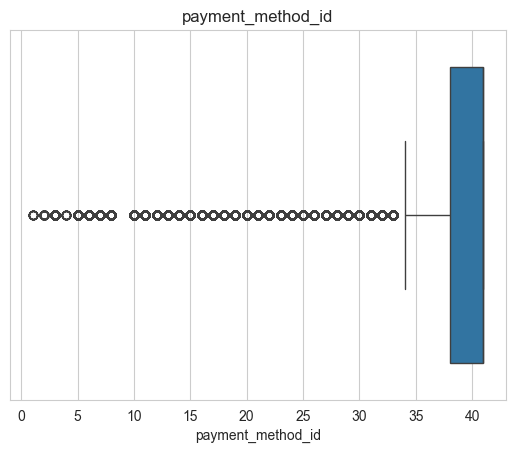

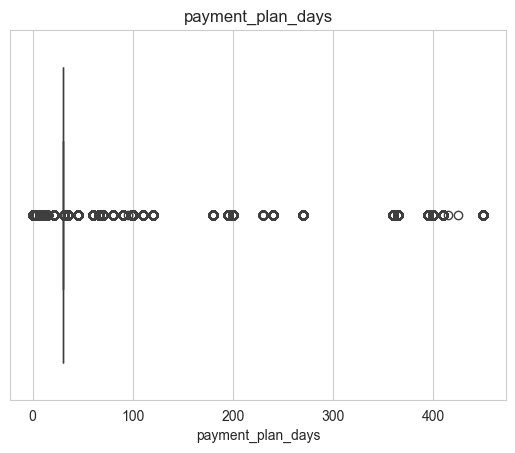

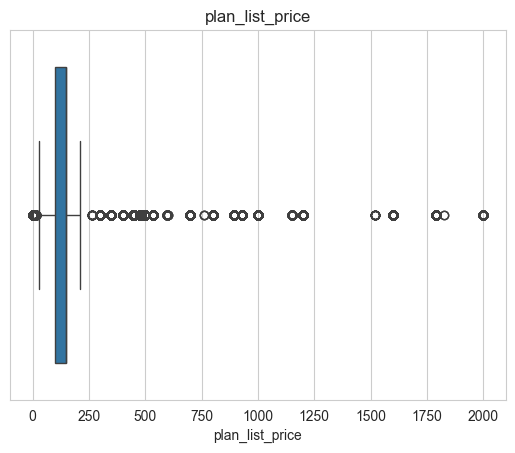

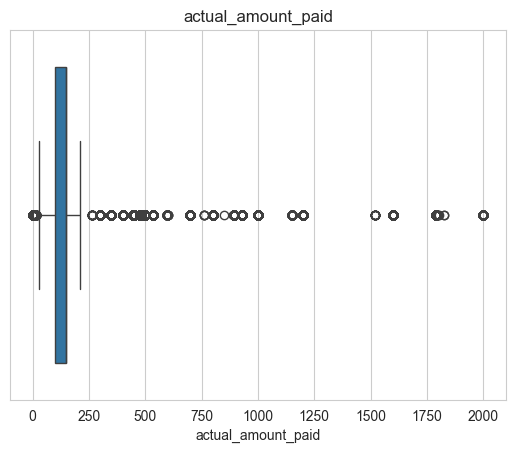

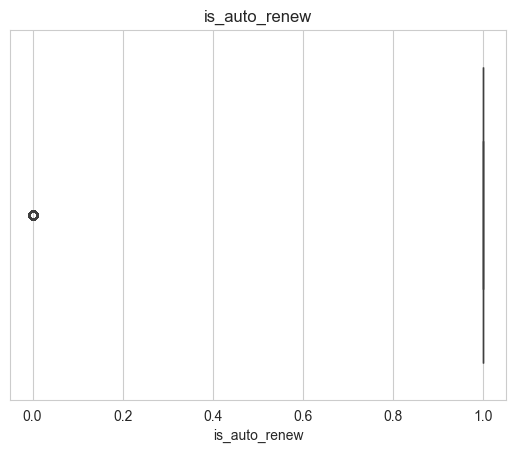


Date Coverage


,transaction_date,membership_expire_date
min,20150101,19700101
max,20170228,20170331



RUNNING EDA FOR: TRAIN

train | Shape: (992931, 2)


,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


Duplicate rows (sample-level): 0


msno        object
is_churn     int64
dtype: object


Missing Values (%)


msno        0.0
is_churn    0.0
dtype: float64


Feature Cardinality


,unique_count,unique_percent
msno,992931,100.000000
is_churn,2,0.000201



Numeric Summary (Sample)


,count,mean,std,min,25%,50%,75%,max
is_churn,992931.0,0.063923,0.244616,0.0,0.0,0.0,0.0,1.0



Categorical Summary

msno


msno
waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=    1
QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=    1
fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=    1
mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=    1
XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=    1
GBy8qSz16X5iYWD+3CMxv/Hm6OPSrXBYtmbnlRtknW0=    1
lYLh7TdkWpIoQs3i3o6mIjLH8/IEgMWP9r7OpsLX0Vo=    1
T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=    1
Nb1ZGEmagQeba5E+nQj8VlQoWl+8SFmLZu+Y8ytIamw=    1
MkuWz0Nq6/Oq5fKqRddWL7oh2SLUSRe3/g+XmAWqW1Q=    1
Name: count, dtype: int64


Outlier Scan


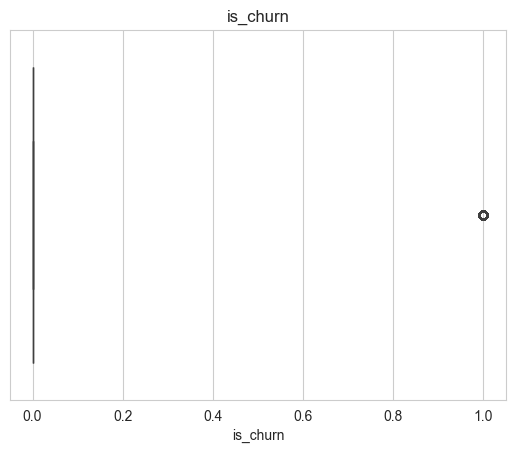


Date Coverage

RUNNING EDA FOR: USERS

users | Shape: (11764314, 9)


,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,OcZ3fKQzHrL1BuzuFRzUiwPr8l9P8JKCFpafdYf5sCY=,20150419,0,0,0,1,7,5,2106.230
1,9IzdFLkXN+UUsGLLC3C5cEaChLBk/NhJWIwM+CvsMbE=,20160713,4,0,1,0,4,8,1202.130
2,diUgkttaptgINCHKMUs78D4ICR0H5QP35tf0mzBor3Q=,20160215,4,1,0,4,15,23,4994.977
3,diUgkttaptgINCHKMUs78D4ICR0H5QP35tf0mzBor3Q=,20160408,7,1,0,0,27,23,7091.646
4,Lt9h3c2w7d0Jn3pVueTNbxCDZ1nqH8gUkqhl1v3BXR4=,20151009,0,0,0,0,6,6,288.183


Duplicate rows (sample-level): 0


msno           object
date            int64
num_25          int64
num_50          int64
num_75          int64
num_985         int64
num_100         int64
num_unq         int64
total_secs    float64
dtype: object


Missing Values (%)


msno          0.0
date          0.0
num_25        0.0
num_50        0.0
num_75        0.0
num_985       0.0
num_100       0.0
num_unq       0.0
total_secs    0.0
dtype: float64


Feature Cardinality


,unique_count,unique_percent
total_secs,7953277,67.605106
msno,1653002,14.050985
num_100,1288,0.010948
date,790,0.006715
num_unq,746,0.006341
num_25,726,0.006171
num_50,328,0.002788
num_985,259,0.002202
num_75,213,0.001811



Numeric Summary (Sample)


,count,mean,std,min,25%,50%,75%,max
date,11764314.0,2.015739e+07,6.182103e+03,2.015010e+07,2.015082e+07,2.016031e+07,2.016091e+07,2.017023e+07
num_25,11764314.0,6.516456e+00,1.455272e+01,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,5.068000e+03
num_50,11764314.0,1.640171e+00,4.224295e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.810000e+02
num_75,11764314.0,1.018195e+00,2.202809e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.900000e+02
num_985,11764314.0,1.129691e+00,2.871495e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.335000e+03
num_100,11764314.0,3.071792e+01,4.249828e+01,0.000000e+00,6.000000e+00,1.700000e+01,3.800000e+01,1.811400e+04
num_unq,11764314.0,3.009089e+01,3.377470e+01,1.000000e+00,8.000000e+00,1.900000e+01,4.000000e+01,2.934000e+03
total_secs,11764314.0,-1.501384e+12,1.179741e+14,-9.223372e+15,1.891709e+03,4.630007e+03,1.026052e+04,9.223372e+15



Numeric Min/Max (Exact)


,min,max



Categorical Summary

msno


msno
tECeqQrkbxSKMVVJu3pYIN+JmbOvwwLdh1s0E6hwsBw=    45
mjjAV0+XrJENpH51ZSZDOfb2d7T+Lz6L0jnrBf7C4UY=    44
CvnhlQsZ64dFzRXRZ1T80l8v8S6yOP5odaLIZhAsV8k=    44
octMf8ZGygE3Vw+Co+IrrudfdyGqE6fC7lC0Berkktg=    43
7XAZ2mXx4Djl5SXpXcdMarVIoyh4SThekMQ5jdoB8pU=    43
JnFtR784h+CbDEyYknS1XDNVjMQ+Ibt7GEeMhygKNv8=    43
w6WtrNMtVDnPGPRpkpHyM+G4eAMqxksTv6Q7Oj79Hz8=    42
I7MKatm/7G7M4dlVzalr4gvTiA0ecrdxowTLpUQ9kh4=    42
pm8zJ1mFCKyYOxiDGVEsnLTsVpSdHn4x+xJZjKSmSp0=    42
7R+WMsJZ1BQ2kv6TKi/nceYwqVX5fx9kkyrnDhWXSI0=    41
Name: count, dtype: int64


Outlier Scan


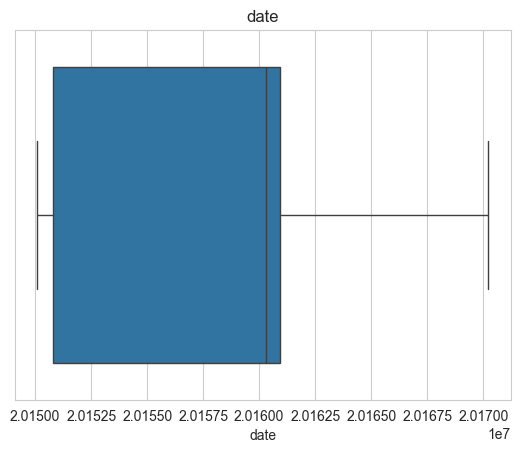

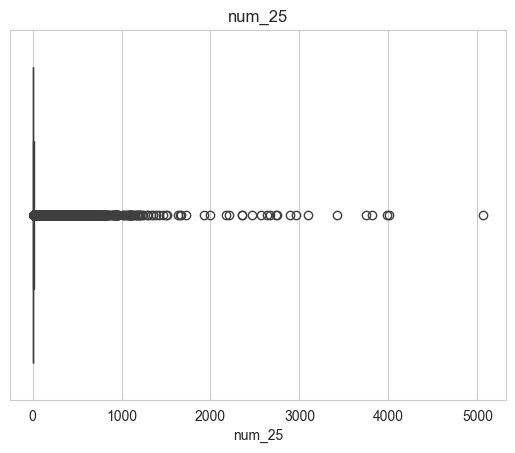

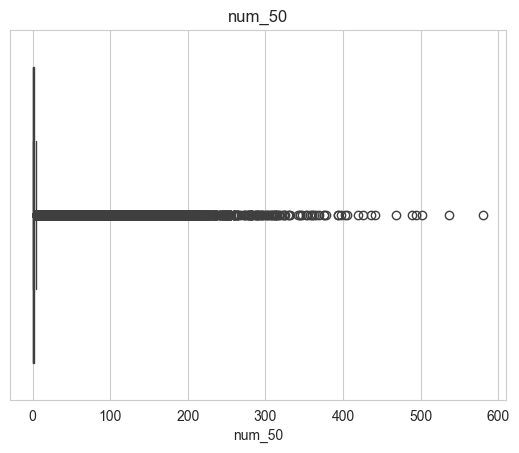

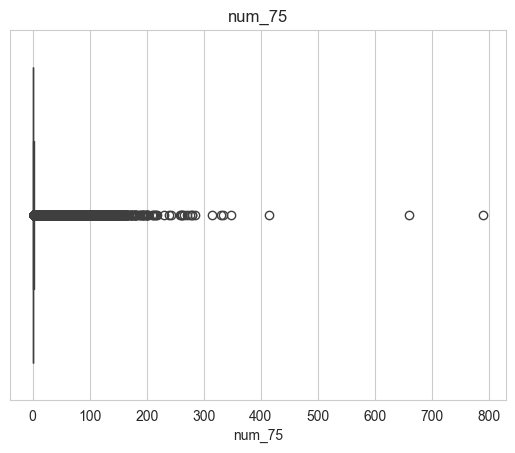

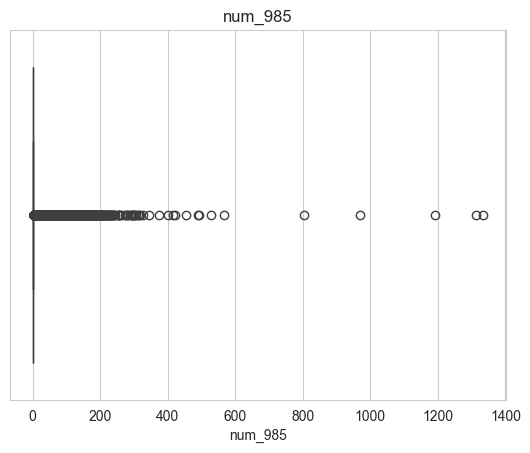


Date Coverage


,min,max


In [23]:
dataset_config = {
    "members": {
        "path": "F:/AI Project/churn-retention-platform/data/raw/members_v3.csv",
        "type": "small"
    },
    "transactions": {
        "path": "F:/AI Project/churn-retention-platform/data/raw/transactions.csv",
        "type": "small"
    },
    "train": {
        "path": "F:/AI Project/churn-retention-platform/data/raw/train.csv",
        "type": "small"
    },
    "users": {
        "path": "F:/AI Project/churn-retention-platform/data/raw/user_logs.csv",
        "type": "large"
    }
}


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

pd.set_option("display.max_columns", 100)
sns.set_style("whitegrid")



def load_dataset(path, mode, sample_frac=0.03, chunksize=200_000):
    if mode == "small":
        return pd.read_csv(path), None

    if mode == "large":
        sample = pd.read_csv(
            path,
            skiprows=lambda i: i > 0 and np.random.rand() > sample_frac
        )
        chunks = pd.read_csv(path, chunksize=chunksize)
        return sample, chunks



def basic_structure(df, name):
    print(f"\n{name} | Shape: {df.shape}")
    display(df.head())


def duplicate_check(df):
    print("Duplicate rows (sample-level):", df.duplicated().sum())


def data_types_check(df):
    display(df.dtypes)


def missing_values(df, chunks=None):
    if chunks is None:
        return (df.isna().mean() * 100).sort_values(ascending=False)

    total_rows = 0
    missing = None

    for chunk in chunks:
        total_rows += len(chunk)
        if missing is None:
            missing = chunk.isna().sum()
        else:
            missing += chunk.isna().sum()

    return (missing / total_rows * 100).sort_values(ascending=False)


def feature_cardinality(df):
    return pd.DataFrame({
        "unique_count": df.nunique(),
        "unique_percent": df.nunique() / len(df) * 100
    }).sort_values("unique_percent", ascending=False)


def numeric_summary_sample(df):
    return df.select_dtypes(include=np.number).describe().T


def numeric_min_max_chunk(chunks):
    mins, maxs = {}, {}

    for chunk in chunks:
        num = chunk.select_dtypes(include=np.number)
        for col in num.columns:
            mins[col] = min(mins.get(col, np.inf), num[col].min())
            maxs[col] = max(maxs.get(col, -np.inf), num[col].max())

    return pd.DataFrame({"min": mins, "max": maxs})


def categorical_summary(df, top_n=10):
    cat_cols = df.select_dtypes(include="object")
    for col in cat_cols.columns:
        print(f"\n{col}")
        display(df[col].value_counts(dropna=False).head(top_n))


def outlier_scan(df):
    for col in df.select_dtypes(include=np.number).columns[:5]:
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()


def date_coverage(df, chunks=None):
    date_cols = [c for c in df.columns if "date" in c.lower() or "time" in c.lower()]

    if not date_cols:
        return

    if chunks is None:
        display(df[date_cols].agg(["min", "max"]))

    else:
        mins, maxs = {}, {}
        for chunk in chunks:
            for col in date_cols:
                chunk[col] = pd.to_datetime(chunk[col], errors="coerce")
                mins[col] = min(mins.get(col, pd.Timestamp.max), chunk[col].min())
                maxs[col] = max(maxs.get(col, pd.Timestamp.min), chunk[col].max())

        display(pd.DataFrame({"min": mins, "max": maxs}))


def run_eda(name, path, dtype):
    print("\n" + "="*70)
    print(f"RUNNING EDA FOR: {name.upper()}")
    print("="*70)

    df_sample, df_chunks = load_dataset(path, dtype)

    basic_structure(df_sample, name)
    duplicate_check(df_sample)
    data_types_check(df_sample)

    print("\nMissing Values (%)")
    display(missing_values(df_sample, df_chunks))

    print("\nFeature Cardinality")
    display(feature_cardinality(df_sample))

    print("\nNumeric Summary (Sample)")
    display(numeric_summary_sample(df_sample))

    if df_chunks is not None:
        print("\nNumeric Min/Max (Exact)")
        display(numeric_min_max_chunk(df_chunks))

    print("\nCategorical Summary")
    categorical_summary(df_sample)

    print("\nOutlier Scan")
    outlier_scan(df_sample)

    print("\nDate Coverage")
    date_coverage(df_sample, df_chunks)


# Run the whole thing
for name, cfg in dataset_config.items():
    run_eda(name, cfg["path"], cfg["type"])


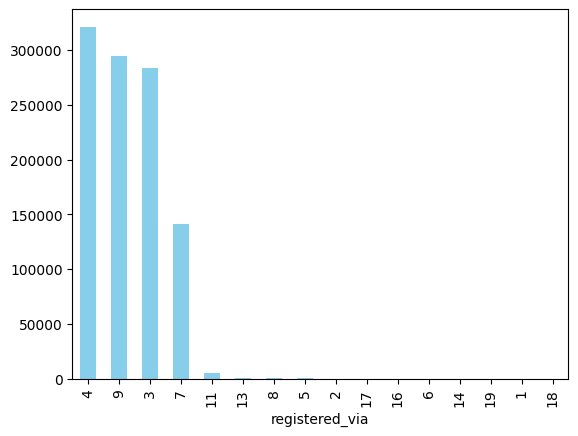

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

members = pd.read_csv("F:/AI Project/churn-retention-platform/data/raw/members_v3.csv")
counts = members['city'].value_counts()
counts.plot(kind='bar', color='skyblue')
plt.show()


In [3]:
import pandas as pd

# Load data
df = pd.read_csv("F:/AI Project/churn-retention-platform/data/raw/transactions.csv")

# Convert integer dates to datetime
df["transaction_date"] = pd.to_datetime(df["transaction_date"], format="%Y%m%d")
df["membership_expire_date"] = pd.to_datetime(df["membership_expire_date"], format="%Y%m%d")

true_rows = df[df["transaction_date"] > df["membership_expire_date"]]

# Count
'''
true_count = len(true_rows)

print(true_rows)
print("Count of TRUE cases:", true_count)
'''
true_rows.to_csv("invalid_transactions.csv", index=False)



In [4]:
# Check to see dataset where txnDate, expiryDate & planDays mismatch --> Action to be taken based on it.

import pandas as pd

INPUT_FILE = "F:/AI Project/churn-retention-platform/data/raw/transactions.csv"
OUTPUT_FILE = "membership_date_mismatch.csv"

# Read full dataset (all columns)
df = pd.read_csv(INPUT_FILE)

# Filter early for scalability
df = df[df["is_cancel"] == 0]

# Convert date columns from int -> datetime
df["transaction_date_dt"] = pd.to_datetime(
    df["transaction_date"], format="%Y%m%d", errors="coerce"
)

df["membership_expire_date_dt"] = pd.to_datetime(
    df["membership_expire_date"], format="%Y%m%d", errors="coerce"
)

# Calculate expected expiry date
df["expected_expiry_date"] = (
    df["transaction_date_dt"]
    + pd.to_timedelta(df["payment_plan_days"], unit="D")
)

# Keep only mismatches
df = df[df["expected_expiry_date"] != df["membership_expire_date_dt"]]

# Overrun / Underrun classification (vectorised)
df["run_status"] = "underrun"
df.loc[
    df["expected_expiry_date"] > df["membership_expire_date_dt"],
    "run_status"
] = "overrun"

# Sort by msno, transaction_date (ascending)
df.sort_values(
    by=["msno", "transaction_date"],
    ascending=[True, True],
    inplace=True
)

# Drop helper datetime columns (optional but recommended)
df.drop(
    columns=[
        "transaction_date_dt",
        "membership_expire_date_dt",
        "expected_expiry_date"
    ],
    inplace=True
)

# Write result to CSV
df.to_csv(OUTPUT_FILE, index=False)

print(f"Mismatch report saved to {OUTPUT_FILE}")


Mismatch report saved to membership_date_mismatch.csv
